## Import Libriaries
#### Bring in the ever important pandas and alias it as the common 'pd' and bring in numpy as the common alias 'np'  and bring in matplotlib as plt

In [101]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import matplotlib.pyplot as plt 

## Read in the data. 

### Read in the data with the pandas function 'read_csv' and then look at the first 5 rows of data with the .head() method  The data is in a .csv file called 'Chicago_Crimes_2012_to_2017.csv' it is located under the data directory under this one. 

In [102]:
crimes = pd.read_csv('data/Chicago_Crimes_2012_to_2017.csv')
crimes.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


## NICE! You now have a dataframe with all of the crimes that were recorded in the city of Chicago from the years 2012 - 2017. 

#### You can see just from the first 5 rows this is a very robust dataset with 23 features(columns) some of these will be useful for this exercise some will not, but we can go through that as we go. What we are going to attempt to do, is find out what crimes if committed give you a higher probability of arrest. 

#### First thing we need to do is get an idea of the condition our data is in, that way we can make adjustments so that it is ready to go through some machine learning to see if we can predict arrests or not. 

#### So let's run some tests, good thing pandas has a lot of built in functionality to help us with this. we will start with the .shape attribute this lets us see how may rows and columns we have. 

#### NOTE: methods like '.head()' always have the '()' trail them, attributes like '.shape' do not have that. 

In [103]:
crimes.shape

(1456714, 23)

### Wow! over 1.4M observations, spanned at 23 rows. This is not exactly 'Big Data' but it is getting close,  Big Data really refers to(and I am going to give you my take other Data Scientists may think diffrently) if the data to large that you run out of memory on your computer(we are talkng RAM here) then it is likely Big Data....

#### Now lets see what kind of data types we are dealing with. Pandas makes this easy as well. with the .dtypes 

In [104]:
crimes.dtypes

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

## Doh! the dreaded 'object' class. This is the datatype that pandas assigns arbitraily if it can not make sense of what kind of datatype it is. 

If we go back up and look at the .head() call we can figure out what data types should be in those columns by looking throught the data. So a couple of these can be looked at and immedietly we can figure them out. 'date' for instance can be cast back into a date time data type. A bunch of these are most likely catagorical variables. which basically means that the data is limited to a finite number of categories like 'Location_Discription' for instance likely only has about 10 diffrent inputs. There are special ways to deal with this so that we can do further analysis, lets check on this one first. Here we are going to use the 'dot notation method' to grab the column(it just means you put the call like this(df.column)) and then add a chained method to get unique values on the column. first we will call df.column.unique() we can also wrap that into a len statement to see how many cats we are dealing with.

### Slight edit, we can't use dot notation on the columns with two or more words right now, because they have a space between the words instead of '_'  the underscore is super important. so we will rename those columns to fix that in the next cell

In [105]:
crimes['Description'].unique()
len(crimes['Description'].unique())

342

## Renaming Columns:
To rename a column into something a bit more usable we basically just add a new column and fill it with the data from the old column, then we drop the old column. First get a list of all the colums

In [106]:
crimes.columns

Index(['Unnamed: 0', 'ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'], dtype='object')

### In pandas and python there is always more than one way to skin a cat. That method is great if you only have one value to change. Since we have such a long list we can create a dictionary of {key:value} pairs  with {'old_column_name':'new_column_name'} and use the rename() method. rename has an argument columns =  that lets you feed it the dictionary and it will take care of the rest.  

In [107]:
cols ={'ID':'id', 
       'Case Number':'case_number', 
       'Date':'date', 
       'Block':'block',
       'Primary Type':'primary_type',
       'Description':'description',
       'Location Description':'location_description',
      'Arrest':'arrest',
      'Domestic':'domestic',
      'Beat':'beat',
      'District':'district',
      'Ward':'ward',
      'Community Area':'community_area',
      'FBI Code':'FBI_code',
      'X Coordinate':'X_corr',
      'Y Coordinate':'Y_corr',
      'Year':'year',
      'Updated On':'updated_on',
      'Latitude':'latitude',
      'Longitude':'longitude',
      'Location':'location'}

crimes.rename(columns=cols, inplace=True)
crimes.head()

,Unnamed: 0,id,case_number,date,block,IUCR,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,FBI_code,X_corr,Y_corr,year,updated_on,latitude,longitude,location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


### Now that we have the columns squared away lets see how many missing values we have:

To do this we will call df.isnull().sum() so we are chaining isnull()- which looks for missing or NaN in columns, and sum which will aggrigate the totals for each column. 

In [108]:
crimes.isnull().sum()

Unnamed: 0                  0
id                          0
case_number                 1
date                        0
block                       0
IUCR                        0
primary_type                0
description                 0
location_description     1658
arrest                      0
domestic                    0
beat                        0
district                    1
ward                       14
community_area             40
FBI_code                    0
X_corr                  37083
Y_corr                  37083
year                        0
updated_on                  0
latitude                37083
longitude               37083
location                37083
dtype: int64

### So about 2% of our data has missing values, the columns that have missing values are not numeric from a calculations stand point so it would be hard to guess what to imput in the place of those missing values. So we will just drop those observations it should not affect our outcome. 

In [109]:
crimes2 = crimes.dropna()

### Lets run the null count again to make sure that took. 

In [110]:
crimes2.isnull().sum()

Unnamed: 0              0
id                      0
case_number             0
date                    0
block                   0
IUCR                    0
primary_type            0
description             0
location_description    0
arrest                  0
domestic                0
beat                    0
district                0
ward                    0
community_area          0
FBI_code                0
X_corr                  0
Y_corr                  0
year                    0
updated_on              0
latitude                0
longitude               0
location                0
dtype: int64

### Ok now we have 0 null records. now lets make sure we dont have any duplicate records. 

In [111]:
crimes2.duplicated().sum()
#crimes2.duplicated()

0

### Great so no duplicates and no nulls. now we need to do a bit of feature engineering to get our data ready for the scikit learn ML library. First we need to encode all of the categorical variables (this is called One-hot ecoding in python.) First thing we need to do is change all the 'object' type data structures to categorical, we are going to use a for loop for this because it just works. 

In [112]:
cat_cols_df = crimes2.drop(columns = ['location','longitude','latitude','arrest','domestic','updated_on','X_corr','Y_corr','date','case_number'])
cat_cols = cat_cols_df.columns
for col in cat_cols:
    crimes2[col] = crimes[col].astype('category')

crimes2.dtypes

/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Unnamed: 0              category
id                      category
case_number               object
date                      object
block                   category
IUCR                    category
primary_type            category
description             category
location_description    category
arrest                      bool
domestic                    bool
beat                    category
district                category
ward                    category
community_area          category
FBI_code                category
X_corr                   float64
Y_corr                   float64
year                    category
updated_on                object
latitude                 float64
longitude                float64
location                  object
dtype: object

### Ok now all of our columns that need to be are of type category! now to deal with Time. this can be troublesome. notice that we categorized the year column. we will do similar things to a time of day column and season of year. but we have to create those first

In [113]:
crimes2.date = pd.to_datetime(crimes2.date)
#crimes2['date'] = pd.to_datetime(crimes2['date'])
crimes2.dtypes

Unnamed: 0                    category
id                            category
case_number                     object
date                    datetime64[ns]
block                         category
IUCR                          category
primary_type                  category
description                   category
location_description          category
arrest                            bool
domestic                          bool
beat                          category
district                      category
ward                          category
community_area                category
FBI_code                      category
X_corr                         float64
Y_corr                         float64
year                          category
updated_on                      object
latitude                       float64
longitude                      float64
location                        object
dtype: object

In [114]:
crimes2.head()

,Unnamed: 0,id,case_number,date,block,IUCR,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,FBI_code,X_corr,Y_corr,year,updated_on,latitude,longitude,location
0,3,10508693,HZ250496,2016-05-03 23:40:00,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,2016-05-03 21:40:00,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,2016-05-03 23:31:00,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,2016-05-03 22:10:00,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,2016-05-03 22:00:00,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


### Now that we have the date as a date time object we can set it as the index, and then pull information from there. 

In [115]:
crimes2.set_index('date', inplace=True)

crimes2['month'] = crimes2.index.month #adds a column called 'month' and pulls the month number out from the index which was updated to be the 'date'
crimes2['hour'] = crimes2.index.hour #adds column called 'hour' and pulls the (24)hour from the index
crimes2['year'] = crimes2.index.year

/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [116]:
crimes2['weekday_name'] = crimes2.index.weekday_name
crimes2.head()

/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,id,case_number,block,IUCR,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,FBI_code,X_corr,Y_corr,year,updated_on,latitude,longitude,location,month,hour,weekday_name
date,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,23,Tuesday
2016-05-03 21:40:00,89,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,21,Tuesday
2016-05-03 23:31:00,197,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,23,Tuesday
2016-05-03 22:10:00,673,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,22,Tuesday
2016-05-03 22:00:00,911,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,22,Tuesday


In [117]:
crimes2['day_of_week'] = crimes2.index.weekday #Monday = 0, Sunday = 6
crimes2.head()

/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,id,case_number,block,IUCR,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,FBI_code,X_corr,Y_corr,year,updated_on,latitude,longitude,location,month,hour,weekday_name,day_of_week
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,23,Tuesday,1
2016-05-03 21:40:00,89,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,21,Tuesday,1
2016-05-03 23:31:00,197,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,23,Tuesday,1
2016-05-03 22:10:00,673,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,22,Tuesday,1
2016-05-03 22:00:00,911,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,22,Tuesday,1


In [118]:
crimes2.dtypes

Unnamed: 0              category
id                      category
case_number               object
block                   category
IUCR                    category
primary_type            category
description             category
location_description    category
arrest                      bool
domestic                    bool
beat                    category
district                category
ward                    category
community_area          category
FBI_code                category
X_corr                   float64
Y_corr                   float64
year                       int64
updated_on                object
latitude                 float64
longitude                float64
location                  object
month                      int64
hour                       int64
weekday_name              object
day_of_week                int64
dtype: object

In [119]:
crimes2.head()

,Unnamed: 0,id,case_number,block,IUCR,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,FBI_code,X_corr,Y_corr,year,updated_on,latitude,longitude,location,month,hour,weekday_name,day_of_week
date,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,23,Tuesday,1
2016-05-03 21:40:00,89,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,21,Tuesday,1
2016-05-03 23:31:00,197,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,23,Tuesday,1
2016-05-03 22:10:00,673,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,22,Tuesday,1
2016-05-03 22:00:00,911,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,22,Tuesday,1


In [120]:
crimes2['time_of_day'] = pd.cut(crimes2.hour, 
                    bins=[0,6,12,18,24], 
                    include_lowest=True, 
                    labels=['overnight','morning','afternoon','evening'])
crimes2.head()


/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Unnamed: 0,id,case_number,block,IUCR,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,FBI_code,X_corr,Y_corr,year,updated_on,latitude,longitude,location,month,hour,weekday_name,day_of_week,time_of_day
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,23,Tuesday,1,evening
2016-05-03 21:40:00,89,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,21,Tuesday,1,evening
2016-05-03 23:31:00,197,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,23,Tuesday,1,evening
2016-05-03 22:10:00,673,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,22,Tuesday,1,evening
2016-05-03 22:00:00,911,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,22,Tuesday,1,evening


In [121]:
crimes2['season'] = pd.cut(crimes2.month, 
                    bins=[2,5,8,11,12], 
                    include_lowest=True, 
                    labels=['spring','summer','fall','winter'])
crimes2.head()



/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Unnamed: 0,id,case_number,block,IUCR,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,FBI_code,X_corr,Y_corr,year,updated_on,latitude,longitude,location,month,hour,weekday_name,day_of_week,time_of_day,season
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,23,Tuesday,1,evening,spring
2016-05-03 21:40:00,89,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,21,Tuesday,1,evening,spring
2016-05-03 23:31:00,197,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,23,Tuesday,1,evening,spring
2016-05-03 22:10:00,673,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,22,Tuesday,1,evening,spring
2016-05-03 22:00:00,911,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,22,Tuesday,1,evening,spring


In [122]:
crimes2['weekday'] = ((crimes2.day_of_week) // 5 == 0).astype(float)
crimes2.head()

/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,id,case_number,block,IUCR,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,FBI_code,X_corr,Y_corr,year,updated_on,latitude,longitude,location,month,hour,weekday_name,day_of_week,time_of_day,season,weekday
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,23,Tuesday,1,evening,spring,1.0
2016-05-03 21:40:00,89,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,21,Tuesday,1,evening,spring,1.0
2016-05-03 23:31:00,197,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,23,Tuesday,1,evening,spring,1.0
2016-05-03 22:10:00,673,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,22,Tuesday,1,evening,spring,1.0
2016-05-03 22:00:00,911,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,22,Tuesday,1,evening,spring,1.0


In [123]:
crimes2.dtypes

Unnamed: 0              category
id                      category
case_number               object
block                   category
IUCR                    category
primary_type            category
description             category
location_description    category
arrest                      bool
domestic                    bool
beat                    category
district                category
ward                    category
community_area          category
FBI_code                category
X_corr                   float64
Y_corr                   float64
year                       int64
updated_on                object
latitude                 float64
longitude                float64
location                  object
month                      int64
hour                       int64
weekday_name              object
day_of_week                int64
time_of_day             category
season                  category
weekday                  float64
dtype: object

In [124]:
crimes2.month = crimes2.month.astype('category')
crimes2.dtypes

Unnamed: 0              category
id                      category
case_number               object
block                   category
IUCR                    category
primary_type            category
description             category
location_description    category
arrest                      bool
domestic                    bool
beat                    category
district                category
ward                    category
community_area          category
FBI_code                category
X_corr                   float64
Y_corr                   float64
year                       int64
updated_on                object
latitude                 float64
longitude                float64
location                  object
month                   category
hour                       int64
weekday_name              object
day_of_week                int64
time_of_day             category
season                  category
weekday                  float64
dtype: object

In [125]:
columns = ['weekday_name','day_of_week','hour']
for col in columns:
    crimes2[col] = crimes2[col].astype('category')
    
crimes2.dtypes

/Users/user/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Unnamed: 0              category
id                      category
case_number               object
block                   category
IUCR                    category
primary_type            category
description             category
location_description    category
arrest                      bool
domestic                    bool
beat                    category
district                category
ward                    category
community_area          category
FBI_code                category
X_corr                   float64
Y_corr                   float64
year                       int64
updated_on                object
latitude                 float64
longitude                float64
location                  object
month                   category
hour                    category
weekday_name            category
day_of_week             category
time_of_day             category
season                  category
weekday                  float64
dtype: object

In [126]:
crimes2.arrest.value_counts()

False    1047308
True      371057
Name: arrest, dtype: int64

In [127]:
(crimes2.arrest == 'True').astype('int')
crimes2.head()

,Unnamed: 0,id,case_number,block,IUCR,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,FBI_code,X_corr,Y_corr,year,updated_on,latitude,longitude,location,month,hour,weekday_name,day_of_week,time_of_day,season,weekday
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,23,Tuesday,1,evening,spring,1.0
2016-05-03 21:40:00,89,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,21,Tuesday,1,evening,spring,1.0
2016-05-03 23:31:00,197,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,23,Tuesday,1,evening,spring,1.0
2016-05-03 22:10:00,673,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,22,Tuesday,1,evening,spring,1.0
2016-05-03 22:00:00,911,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,22,Tuesday,1,evening,spring,1.0


In [128]:
crimes2.dtypes

Unnamed: 0              category
id                      category
case_number               object
block                   category
IUCR                    category
primary_type            category
description             category
location_description    category
arrest                      bool
domestic                    bool
beat                    category
district                category
ward                    category
community_area          category
FBI_code                category
X_corr                   float64
Y_corr                   float64
year                       int64
updated_on                object
latitude                 float64
longitude                float64
location                  object
month                   category
hour                    category
weekday_name            category
day_of_week             category
time_of_day             category
season                  category
weekday                  float64
dtype: object

Class 0: 1047308
Class 1: 371057
Proportion: 2.82 : 1


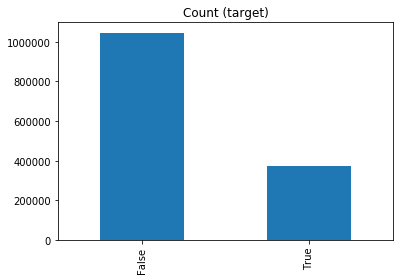

In [129]:
target_count = crimes2.arrest.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [130]:
crimes2.head(50) #used 50 so I could see more of the data

,Unnamed: 0,id,case_number,block,IUCR,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,FBI_code,X_corr,Y_corr,year,updated_on,latitude,longitude,location,month,hour,weekday_name,day_of_week,time_of_day,season,weekday
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-05-03 23:40:00,3,10508693,HZ250496,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,1022,10.0,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)",5,23,Tuesday,1,evening,spring,1.0
2016-05-03 21:40:00,89,10508695,HZ250409,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,313,3.0,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)",5,21,Tuesday,1,evening,spring,1.0
2016-05-03 23:31:00,197,10508697,HZ250503,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,False,1524,15.0,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)",5,23,Tuesday,1,evening,spring,1.0
2016-05-03 22:10:00,673,10508698,HZ250424,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,False,1532,15.0,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)",5,22,Tuesday,1,evening,spring,1.0
2016-05-03 22:00:00,911,10508699,HZ250455,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,True,1523,15.0,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)",5,22,Tuesday,1,evening,spring,1.0
2016-05-03 22:35:00,1108,10508702,HZ250447,082XX S MARYLAND AVE,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,631,6.0,8.0,44.0,04B,1183336.0,1850642.0,2016,05/10/2016 03:56:50 PM,41.745354,-87.603799,"(41.745354023, -87.603798903)",5,22,Tuesday,1,evening,spring,1.0
2016-05-03 22:30:00,1130,10508703,HZ250489,027XX S STATE ST,0460,BATTERY,SIMPLE,CHA HALLWAY/STAIRWELL/ELEVATOR,False,False,133,1.0,3.0,35.0,08B,1176730.0,1886544.0,2016,05/10/2016 03:56:50 PM,41.844024,-87.626923,"(41.844023772, -87.626923253)",5,22,Tuesday,1,evening,spring,1.0
2016-05-03 21:30:00,1801,10508704,HZ250514,002XX E 46TH ST,0460,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,215,2.0,3.0,38.0,08B,1178514.0,1874573.0,2016,05/10/2016 03:56:50 PM,41.811134,-87.620741,"(41.811133958, -87.62074077)",5,21,Tuesday,1,evening,spring,1.0
2016-05-03 16:00:00,1868,10508709,HZ250523,014XX W DEVON AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,2432,24.0,40.0,1.0,08B,1165696.0,1942616.0,2016,05/10/2016 03:56:50 PM,41.998131,-87.665814,"(41.99813061, -87.665814038)",5,16,Tuesday,1,afternoon,spring,1.0


### How many crimes were committed by year? 

Hint use a groupby clause and visualize the output. 

In [131]:
crimes_year = crimes2.groupby('year')['id'].count()
crimes_year.head(6) #6 was used to show each year included within the data set

year
2012    334397
2013    304267
2014    269329
2015    259610
2016    250732
2017        30
Name: id, dtype: int64

### How many crimes were commited by type per year?


In [132]:
crimes_year_bytype = crimes2.groupby(['primary_type', 'year'])['id'].count()
crimes_year_bytype.head(15) #15 was arbitrarly chosen just to show a little more data than the default 5 lines

primary_type  year
ARSON         2012      469
              2013      364
              2014      390
              2015      448
              2016      504
ASSAULT       2012    19890
              2013    17925
              2014    16668
              2015    16945
              2016    18080
BATTERY       2012    59117
              2013    53869
              2014    48690
              2015    48579
              2016    48686
Name: id, dtype: int64

### What is the percentage of arrests by crime commited per year?

In [133]:
arrests_year = crimes2.groupby(['primary_type', 'year', 'arrest'])['id'].count()
arrests_year.head(10)
#shows data but not as percentages

primary_type  year  arrest
ARSON         2012  False     423
                    True       46
              2013  False     318
                    True       46
              2014  False     358
                    True       32
              2015  False     400
                    True       48
              2016  False     461
                    True       43
Name: id, dtype: int64

In [134]:
percentage_arrests = (crimes_year_bytype / arrests_year)
percentage_arrests.head(10)

primary_type  year  arrest
ARSON         2012  False      1.108747
                    True      10.195652
              2013  False      1.144654
                    True       7.913043
              2014  False      1.089385
                    True      12.187500
              2015  False      1.120000
                    True       9.333333
              2016  False      1.093275
                    True      11.720930
Name: id, dtype: float64

### What percentage of crimes are Domestic in nature?


In [135]:
domestic_crimes_series = crimes2.loc[ :, 'domestic']
domestic_crimes_series.value_counts(True)

#15.1677% percentage of crimes where domestic

False    0.848323
True     0.151677
Name: domestic, dtype: float64

### How many Domestic Assualts were there?

In [136]:
domestic_assaults_series = crimes2.groupby(['primary_type', 'domestic'])['id'].count()
domestic_assaults_series.head()

#There were 22,625 domestic assaults

primary_type  domestic
ARSON         False         2085
              True            90
ASSAULT       False        66883
              True         22625
BATTERY       False       132178
Name: id, dtype: int64

### How many Homocides were there?
### What percentage of Homocides were Domestic?

In [137]:
homicides = crimes2.groupby(['primary_type'])['id'].count()
homicides.head(15)

#There were 2,590 (2,422 + 168) homicides


domestic_homicides_series = crimes2.groupby(['primary_type','domestic'])['id'].count()
domestic_homicides_series.head(30)

#There were 168 domestic homicides

primary_type                       domestic
ARSON                              False         2085
                                   True            90
ASSAULT                            False        66883
                                   True         22625
BATTERY                            False       132178
                                   True        126763
BURGLARY                           False        81058
                                   True           610
CONCEALED CARRY LICENSE VIOLATION  False           84
CRIM SEXUAL ASSAULT                False         5391
                                   True           907
CRIMINAL DAMAGE                    False       137188
                                   True         15624
CRIMINAL TRESPASS                  False        34951
                                   True          1478
DECEPTIVE PRACTICE                 False        66968
                                   True           641
GAMBLING                           Fal

### Is there a concentration of violent crimes in certain parts of Chicago? 
Hint: you are going to have to subset the crimes types that are considered violent(you will have to decide which) 

5834
The part of Chicago where violent crimes i.e. Assaults mostly occur is community area # 25.0  at a total count of  5834


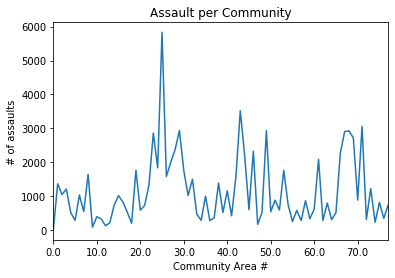

5834
The greatest number of assualts is  5834  which occured in community area # 25.0

18996
The part of Chicago where violent crimes i.e. Batteries mostly occur is community area # 25.0  at a total count of  18996


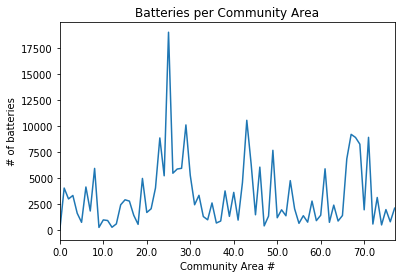

The greatest number of batteries is  18996  which occured in community area # 25.0

411
The part of Chicago where violent crimes i.e. Criminal Sexual Assaults mostly occur is community area # 25.0  at a total count of  411


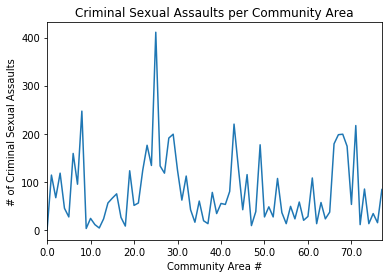

411
The greatest number of criminal sexual assaults is  411  which occured in community area # 25.0

247
The part of Chicago where violent crimes i.e. homicides mostly occur is community area # 25.0  at a total count of  247


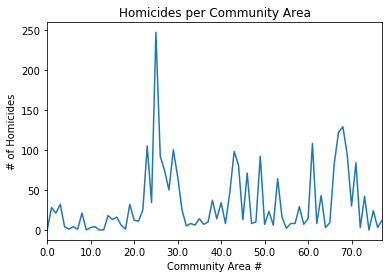

411
The greatest number of homicides is  411  which occured in community area # 25.0



In [138]:
#I will categorize the following primary_type of crimes as violent
#ASSAULT at first, then will attempt to individually add BATTERY, CRIM SEXUAL ASSAULT, and HOMICIDE to see if there are any trends WRT concentration of violet crimes

indices = crimes2['primary_type'] == 'ASSAULT'
assault = crimes2.loc[indices, :]
community_assault = assault.groupby(['community_area'])['id'].count()
max_element_value = np.amax(community_assault)
print(max_element_value)
max_element_observation = community_assault.idxmax()
print("The part of Chicago where violent crimes i.e. Assaults mostly occur is community area #", max_element_observation, " at a total count of ", max_element_value)

community.plot()
plt.xlabel('Community Area #')
plt.ylabel('# of assaults')
plt.title('Assault per Community')
plt.show()
y_max = community.max()
print(y_max)
#how do i find the corresponding x value for y = y_max?
print('The greatest number of assualts is ', y_max, ' which occured in community area #', max_element_observation, end = "\n\n")

###
indices = crimes2['primary_type'] == 'BATTERY'
battery = crimes2.loc[indices, :]
community_battery = battery.groupby(['community_area'])['id'].count()
max_element_value = np.amax(community_battery)
print(max_element_value)
max_element_observation = community_battery.idxmax()
print("The part of Chicago where violent crimes i.e. Batteries mostly occur is community area #", max_element_observation, " at a total count of ", max_element_value)

community_battery.plot()
plt.xlabel('Community Area #')
plt.ylabel('# of batteries')
plt.title('Batteries per Community Area')
plt.show()
y_max = community_battery.max()
print('The greatest number of batteries is ', y_max, ' which occured in community area #', max_element_observation, end = "\n\n")

###
indices = crimes2['primary_type'] == 'CRIM SEXUAL ASSAULT'
csa = crimes2.loc[indices, :]
community_csa = csa.groupby(['community_area'])['id'].count()
max_element_value = np.amax(community_csa)
print(max_element_value)
max_element_observation = community_csa.idxmax()
print("The part of Chicago where violent crimes i.e. Criminal Sexual Assaults mostly occur is community area #", max_element_observation, " at a total count of ", max_element_value)

community_csa.plot()
plt.xlabel('Community Area #')
plt.ylabel('# of Criminal Sexual Assaults')
plt.title('Criminal Sexual Assaults per Community Area')
plt.show()
y_max = community_csa.max()
print(y_max)
print('The greatest number of criminal sexual assaults is ', y_max, ' which occured in community area #', max_element_observation, end = "\n\n")

###
indices = crimes2['primary_type'] == 'HOMICIDE'
homicide = crimes2.loc[indices, :]
community_homicide = homicide.groupby(['community_area'])['id'].count()
max_element_value = np.amax(community_homicide)
print(max_element_value)
max_element_observation = community_homicide.idxmax()
print("The part of Chicago where violent crimes i.e. homicides mostly occur is community area #", max_element_observation, " at a total count of ", max_element_value)

community_homicide.plot()
plt.xlabel('Community Area #')
plt.ylabel('# of Homicides')
plt.title('Homicides per Community Area')
plt.show()
y_max = community_csa.max()
print(y_max)
print('The greatest number of homicides is ', y_max, ' which occured in community area #', max_element_observation, end = "\n\n")

#From crimes2.head() I see that one set of geo-coordinates associated with community area #25 is in/near an area called Oak Park

### What time of day is most active for crime? 
### What day of the week is most active?
### What month is most active?

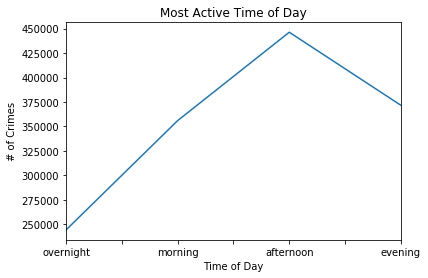

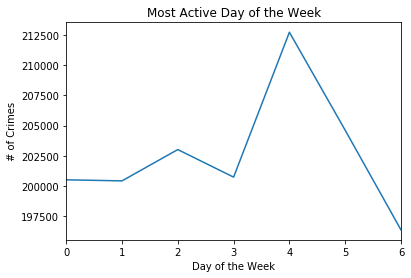

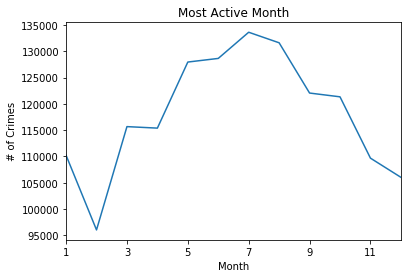

In [139]:
#most active time of day
#most_active_time = crimes2.loc[:,'time_of_day']
most_active_time_of_day = crimes2.groupby(['time_of_day'])['id'].count()
most_active_time_of_day.plot()
plt.xlabel('Time of Day')
plt.ylabel('# of Crimes')
plt.title('Most Active Time of Day')
plt.show()
#Afternoon is the most active time of day for crime

#most active day of the week
most_active_time_of_day = crimes2.groupby(['day_of_week'])['id'].count()
most_active_time_of_day.plot()
plt.xlabel('Day of the Week')
plt.ylabel('# of Crimes')
plt.title('Most Active Day of the Week')
plt.show()
#The most active day of the week is day #4 which is Friday

#most active month
most_active_month = crimes2.groupby(['month'])['id'].count()
most_active_month.plot()
plt.xlabel('Month')
plt.ylabel('# of Crimes')
plt.title('Most Active Month')
plt.show()
#The most active month is month #7 which is July

### Where do most crimes occur?
### Where do most Homocides occur?


325084
The location where the most crimes occur is  STREET at a total count of  325084


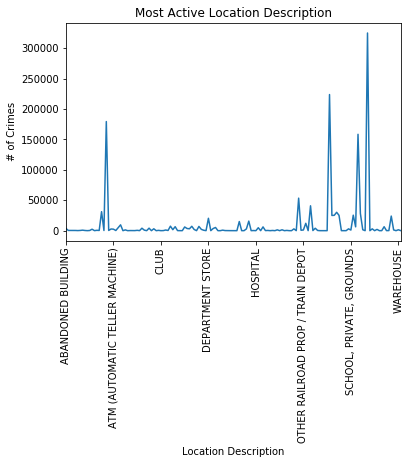

1437
The location where the most homicides occur is  STREET at a total count of  1437


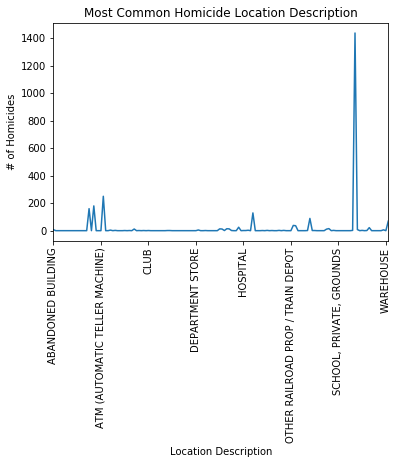

In [140]:
#Where do most crimes occur
most_active_location_description = crimes2.groupby(['location_description'])['id'].count()
max_element_value = np.amax(most_active_location_description)
print(max_element_value)
max_element_observation = most_active_location_description.idxmax()
print("The location where the most crimes occur is ", max_element_observation, "at a total count of ", max_element_value)

most_active_location_description.plot()
plt.xlabel('Location Description')
plt.ylabel('# of Crimes')
plt.title('Most Active Location Description')
plt.xticks(rotation=90)
plt.show()


#Where do most homicides occur
indices = crimes2['primary_type'] == 'HOMICIDE'
homicides = crimes2.loc[indices, :]

homicides_by_location_description = homicides.groupby(['location_description'])['id'].count()
max_element_value = np.amax(homicides_by_location_description)
print(max_element_value)
max_element_observation = homicides_by_location_description.idxmax()
print("The location where the most homicides occur is ", max_element_observation, "at a total count of ", max_element_value)

homicides_by_location_description.plot()
plt.xlabel('Location Description')
plt.ylabel('# of Homicides')
plt.title('Most Common Homicide Location Description')
plt.xticks(rotation=90)
plt.show()


### What days and hours have the most crimes?

82454
The hour when most crimes occur is  19 at a total count of  82454


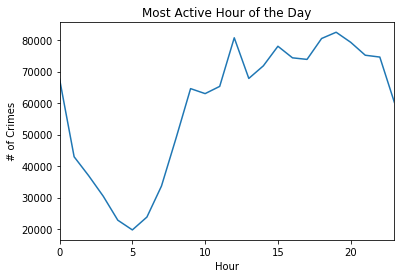

212747
The weekday which most crimes occur is  Friday at a total count of  212747


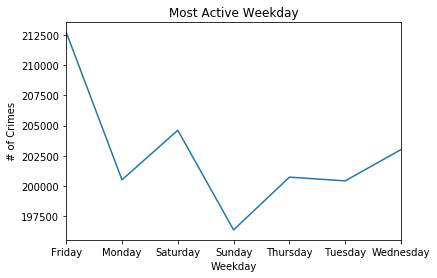

In [143]:
#what hour has the most crimes
most_active_hour = crimes2.groupby(['hour'])['id'].count()
max_element_value = np.amax(most_active_hour)
print(max_element_value)
max_element_observation = most_active_hour.idxmax()
print("The hour when most crimes occur is ", max_element_observation, "at a total count of ", max_element_value)

most_active_hour.plot()
plt.xlabel('Hour')
plt.ylabel('# of Crimes')
plt.title('Most Active Hour of the Day')
plt.show()
#1900 or 7pm is the most active hour of the day for crime

#what weekday has the most crimes
most_active_weekday = crimes2.groupby(['weekday_name'])['id'].count()
max_element_value = np.amax(most_active_weekday)
print(max_element_value)
max_element_observation = most_active_weekday.idxmax()
print("The weekday which most crimes occur is ", max_element_observation, "at a total count of ", max_element_value)

most_active_weekday.plot()
plt.xlabel('Weekday')
plt.ylabel('# of Crimes')
plt.title('Most Active Weekday')
plt.show()

#Friday is the most active weekday for crime

### When you are done commit your changes back to the repo. you will need to follow the instructions [here](https://kbroman.org/github_tutorial/pages/fork.html)